# Some Simple Analysis of the Philosophy Data Project

### By Yongxin Ma

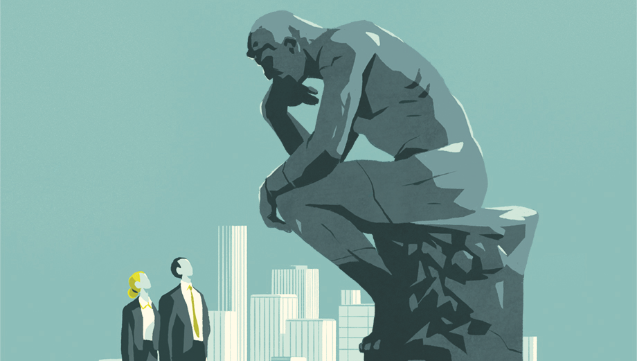

## 1. Introduction to the Project

We cannot deny that fact that philosophy is hard to read and understand especially for someone studies mathematics like me. But it’s still necessary for learn about philosophy because every time we think, we are a philosopher. So, I would let the machine to do the boring stuff for me. And in the same time, I try to capture some numerical features of the philosophy data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk

## 2. Import, Preview, Preprocessing of the Data

The basic data given is around 360,000 including string and numbers. The basic idea is to apply numerical methods for the digital data. For the string part, calculate the frequency and apply sentiment analysis should work.

In [2]:
#read the given data
df=pd.read_csv('philosophy_data.csv')

#preview the data
df.info()
#print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


Notice that the tokenized sentence which is the underlying data for later use is in the form of letters seperately. So we need to transform the data into words.

In [3]:
#derive the words from tokenized_txt
df['number_of_tokens'] = list(map(len,map(eval,df.tokenized_txt)))
df['tokens_derived'] =list( map(eval,df.tokenized_txt))
#df['tokens_derived'].iloc[0][0]

                                                                                    title
school          author          title                                                    
analytic        Kripke          Naming And Necessity                                 2681
                                Philosophical Troubles                               9798
                Lewis           Lewis - Papers                                      13120
                Moore           Philosophical Studies                                3668
                Popper          The Logic Of Scientific Discovery                    4678
                Quine           Quintessence                                         7373
                Russell         The Analysis Of Mind                                 3513
                                The Problems Of Philosophy                           1560
                Wittgenstein    On Certainty                                         1984
          

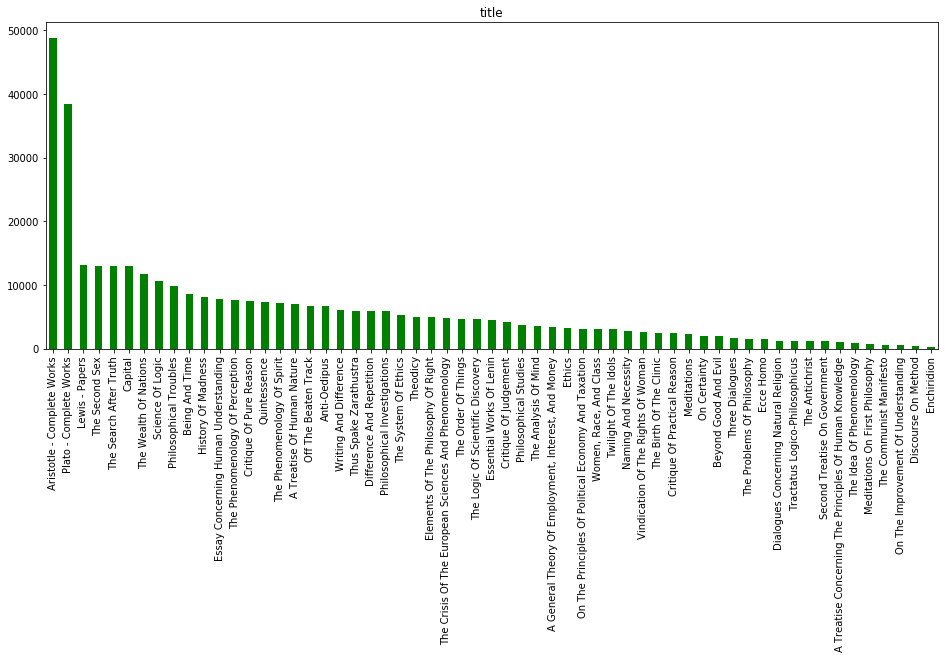

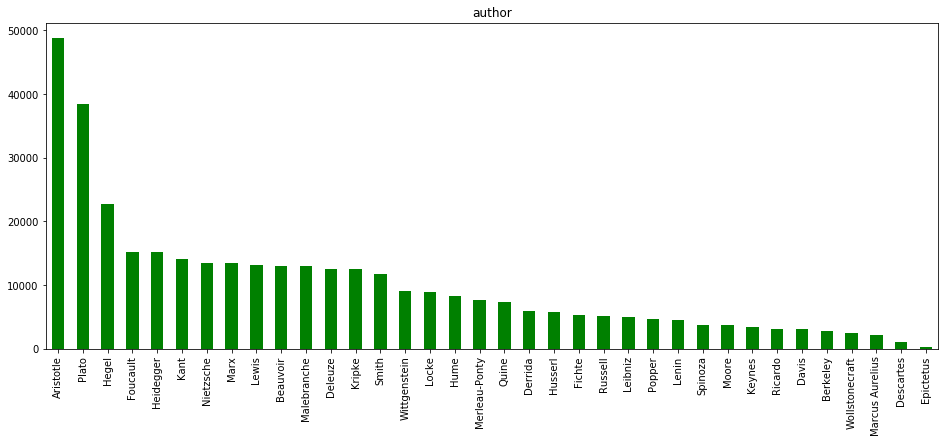

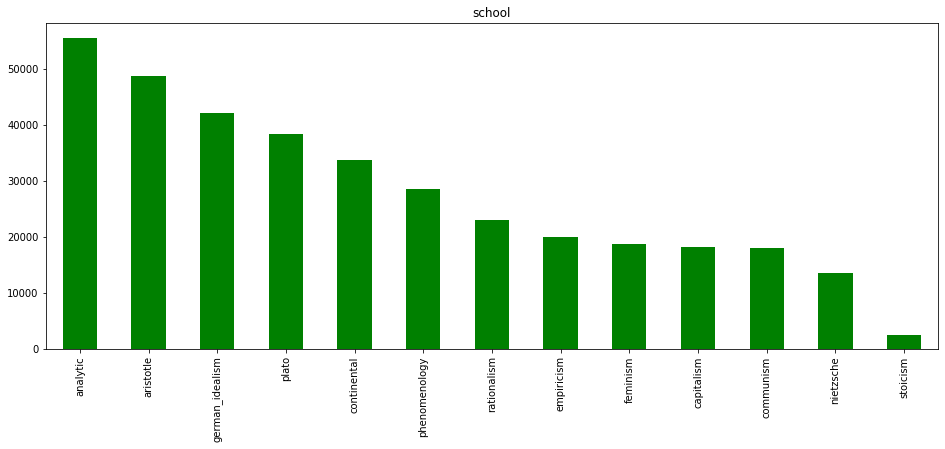

In [4]:
#visualize overall data grouped by title author and school
group_method_list=['title','author','school']
#preview the data by graph which is grouped by features
print(pd.DataFrame( df.groupby(by=['school','author','title'])['title'].count() ))
for method in group_method_list:
    plt.figure(figsize=(16,6))
    df[method].value_counts().plot(kind='bar',color='g')
    plt.title(method)
    plt.show()

## 3. Some Analysis of the Data

### (1) Numerical Features of the Data

For the digital numbers which are sentence length of the data and number of tokens, we can visualize the frequency of it and see what happens to different schools.

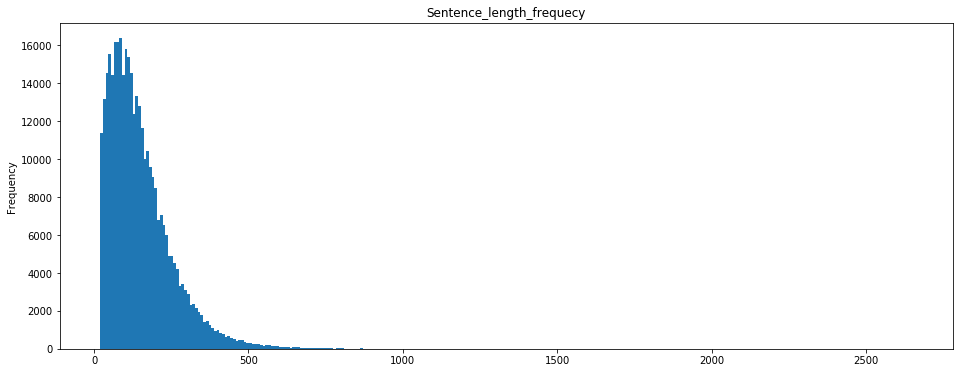

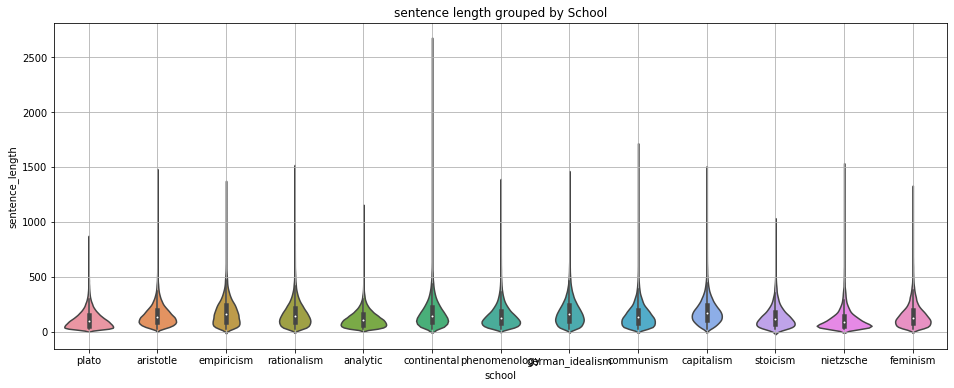

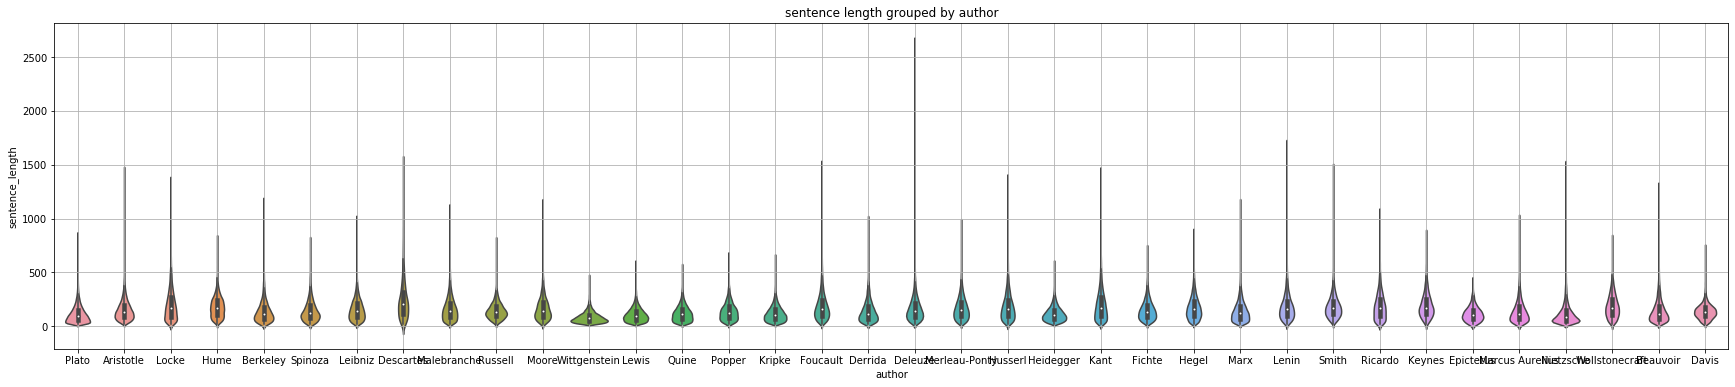

In [33]:
#Some of the numerical features

#Sentence length
df.sentence_length.describe()
plt.figure(figsize=(16,6))
df.sentence_length.plot(kind='hist',bins=300)
plt.title('Sentence_length_frequecy')
plt.show()

#view by different schools
schools=df.school.unique().tolist()
plt.figure(figsize=(16,6))
sb.violinplot(x='school', y='sentence_length', data=df)
plt.title('sentence length grouped by School')
plt.grid()

#view by different authors
authors=df.author.unique().tolist()
plt.figure(figsize=(30,6))
sb.violinplot(x='author', y='sentence_length', data=df)
plt.title('sentence length grouped by author')
plt.grid()


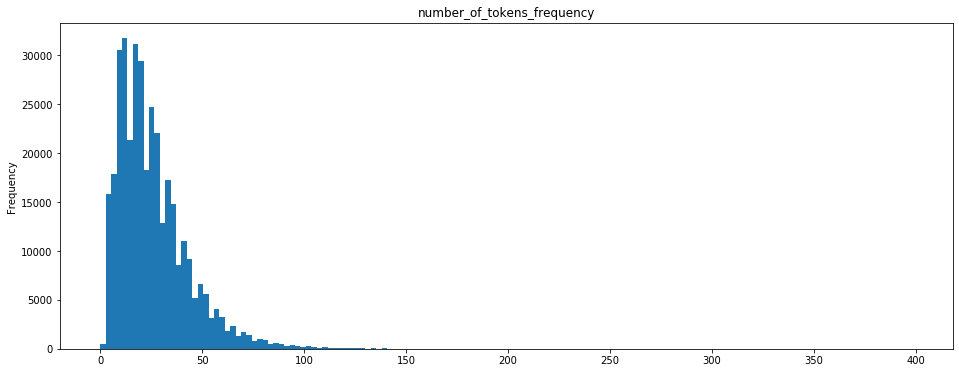

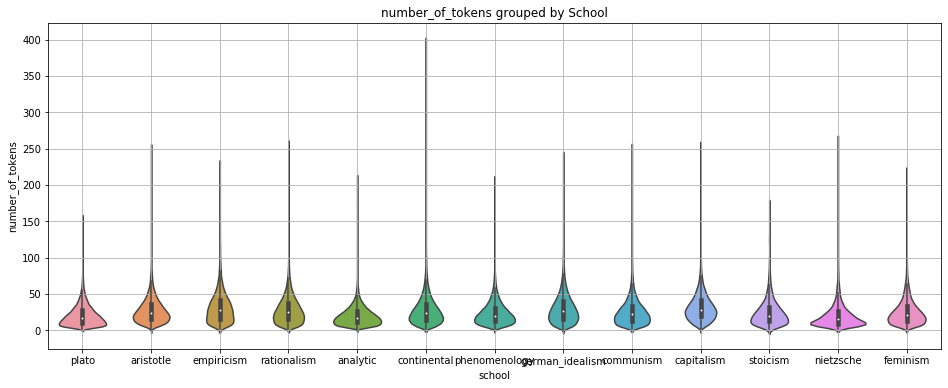

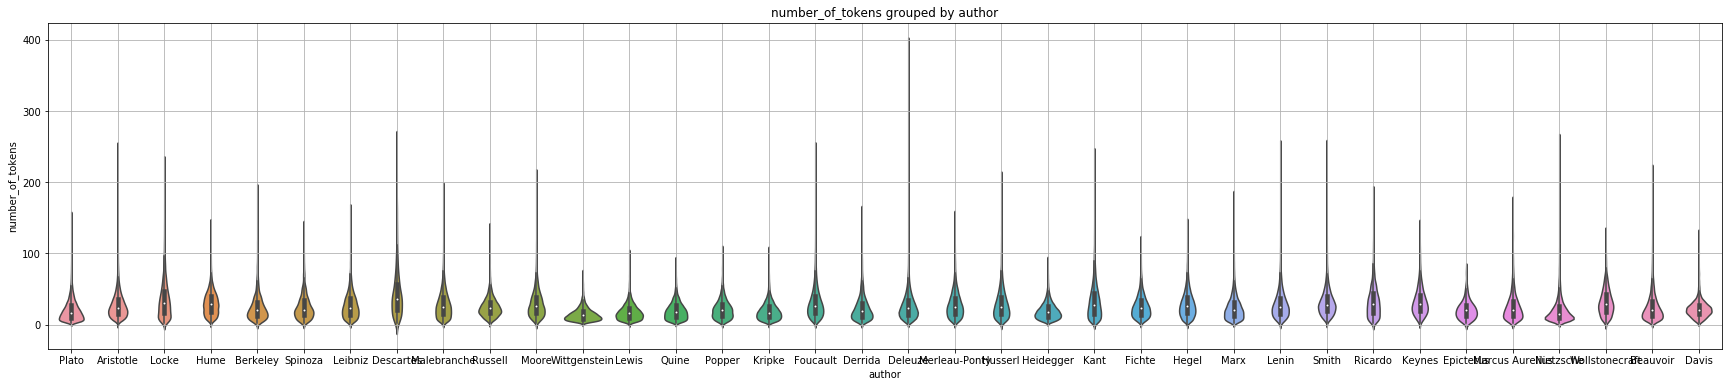

In [6]:
#number of tokens
df.number_of_tokens.describe()
plt.figure(figsize=(16,6))
df.number_of_tokens.plot(kind='hist',bins=150)
plt.title('number_of_tokens_frequency')
plt.show()

#view by different schools
plt.figure(figsize=(16,6))
sb.violinplot(x='school', y='number_of_tokens', data=df)
plt.title('number_of_tokens grouped by School')
plt.grid()

#view by different authors
plt.figure(figsize=(30,6))
sb.violinplot(x='author', y='number_of_tokens', data=df)
plt.title('number_of_tokens grouped by author')
plt.grid()

In [36]:
pd.DataFrame( df.groupby(by=['school','author']).mean() )

original_publication_date  \
school          author                                       
analytic        Kripke                         1974.355477   
                Lewis                          1985.000000   
                Moore                          1910.000000   
                Popper                         1959.000000   
                Quine                          1950.000000   
                Russell                        1918.232407   
                Wittgenstein                   1948.048041   
aristotle       Aristotle                      -320.000000   
capitalism      Keynes                         1936.000000   
                Ricardo                        1817.000000   
                Smith                          1776.000000   
communism       Lenin                          1862.000000   
                Marx                           1881.720810   
continental     Deleuze                        1970.130463   
                Derrida                        1967.000000   
                Foucault                       1962.868832   
empiricism      Berkeley                       1711.858815   
                Hume                           1745.087584   
                Locke                          1689.000000   
feminism        Beauvoir                       1949.000000   
                Davis                          1981.000000   
                Wollstonecraft                 1792.000000   
german_idealism Fichte                         1798.000000   
                Hegel                          1814.523304   
                Kant                           1784.892978   
nietzsche       Nietzsche                      1887.281960   
phenomenology   Heidegger                      1937.163528   
                Husserl                        1931.404040   
                Merleau-Ponty                  1945.000000   
plato           Plato                          -350.000000   
rationalism     Descartes                      1639.798587   
                Leibniz                        1710.000000   
                Malebranche                    1674.000000   
                Spinoza                        1677.000000   
stoicism        Epictetus                       125.000000   
                Marcus Aurelius                 170.000000   

                                 corpus_edition_date  sentence_length  \
school          author                                                  
analytic        Kripke                   2006.488340       119.025082   
                Lewis                    2008.000000       109.717607   
                Moore                    2015.000000       167.254907   
                Popper                   2002.000000       139.545105   
                Quine                    2004.000000       121.643429   
                Russell                  2006.769959       146.296669   
                Wittgenstein             1984.278946        84.883772   
aristotle       Aristotle                1991.000000       153.224953   
capitalism      Keynes                   2003.000000       196.654060   
                Ricardo                  2010.000000       186.252751   
                Smith                    2009.000000       185.277944   
communism       Lenin                    1966.000000       181.423137   
                Marx                     1890.033509       143.253466   
continental     Deleuze                  1995.597847       163.671850   
                Derrida                  2001.000000       143.431239   
                Foucault                 2004.273622       189.637467   
empiricism      Berkeley                 2009.000000       139.653987   
                Hume                     2003.913138       180.192372   
                Locke                    2004.771863       200.395836   
feminism        Beauvoir                 2009.000000       148.790351   
                Davis                    1981.000000       139.671134 

### (2) Corelationship Between the Data

After looking into schools seperately, the next idea is to look into how these schools correlated. The first step is to eliminate duplicated tokens.

In [8]:
#Check the difference among different schools by token
sum_of_tokens=[]
number_list=[]
for sc in schools:
    df_temp = df[df.school==sc]
    print('School = ', sc.upper(), ':')
    token_list=df_temp.tokens_derived.tolist()
    token_school=[]
    for tokens in token_list:
        token_school+=tokens
    uniquelist=[]
    for token in token_school:
        if token not in uniquelist:
            uniquelist.append(token)
    print('total number of tokens is',np.shape(token_school)[0])
    print('total number of unique tokens is',np.shape(uniquelist)[0])
    sum_of_tokens.append(uniquelist)
#print(np.shape(sum_of_tokens))

School =  PLATO :
total number of tokens is 794931
total number of unique tokens is 18616
School =  ARISTOTLE :
total number of tokens is 1342094
total number of unique tokens is 21130
School =  EMPIRICISM :
total number of tokens is 631980
total number of unique tokens is 12941
School =  RATIONALISM :
total number of tokens is 658933
total number of unique tokens is 18909
School =  ANALYTIC :
total number of tokens is 1105119
total number of unique tokens is 24938
School =  CONTINENTAL :
total number of tokens is 944574
total number of unique tokens is 28677
School =  PHENOMENOLOGY :
total number of tokens is 689891
total number of unique tokens is 21095
School =  GERMAN_IDEALISM :
total number of tokens is 1260341
total number of unique tokens is 28104
School =  COMMUNISM :
total number of tokens is 451354
total number of unique tokens is 18320
School =  CAPITALISM :
total number of tokens is 579299
total number of unique tokens is 12569
School =  STOICISM :
total number of tokens is

In [9]:
matrix=np.zeros(shape=(13,13))
for i in range(13):
    for j in range(13):
        sametoken=0
        for k in range(len(sum_of_tokens[j])):
            if sum_of_tokens[j][k] in sum_of_tokens[i]:
                sametoken+=1
        matrix[i][j]=sametoken/len(sum_of_tokens[i])
print(matrix)

[[1.         0.62215299 0.42157284 0.48334766 0.51128062 0.60147185
  0.46513752 0.53454018 0.49392995 0.41029222 0.19692737 0.46744736
  0.59916201]
 [0.54813062 1.         0.39559867 0.44387127 0.46507336 0.55504023
  0.43005206 0.49029815 0.44656886 0.37501183 0.18059631 0.42730715
  0.52446758]
 [0.60644463 0.64593154 1.         0.62375396 0.58442161 0.66895912
  0.5358164  0.63009041 0.57978518 0.53859825 0.2770265  0.55250753
  0.65188162]
 [0.47585806 0.49600719 0.42688667 1.         0.4813052  0.5543392
  0.45406949 0.52313713 0.44153578 0.37828547 0.18737109 0.42133376
  0.51843038]
 [0.38166653 0.39405726 0.30327211 0.36494506 1.         0.48829096
  0.42982597 0.46182533 0.36530596 0.29825968 0.12875932 0.32512631
  0.42641752]
 [0.39045228 0.40896886 0.30187956 0.36551941 0.42462601 1.
  0.41130523 0.4330997  0.3820832  0.29954319 0.12797712 0.34417826
  0.47463124]
 [0.41047642 0.43076558 0.32870348 0.40701588 0.50812989 0.55913724
  1.         0.53439204 0.39630244 0.3206

Text(0.5, 1, 'corelations between different schools')

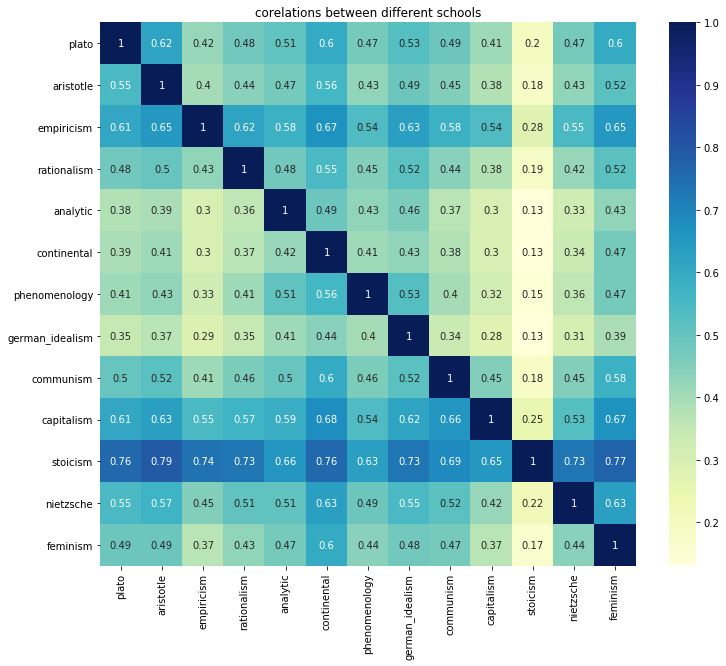

In [10]:
f,ax = plt.subplots(figsize=(12,10))
ax=sb.heatmap(matrix.round(2),xticklabels=schools,yticklabels=schools,annot=True,cmap="YlGnBu")
plt.title('corelations between different schools')

### (3) Word Frequency of the Data (by WordCloud)

Then after looking into the uniqueness of the tokens, the next idea is how the tokens repeat in each schools. So based on the frequency, we can make a word cloud graph.

In [11]:
stopwords = set(STOPWORDS)

School =  PLATO :


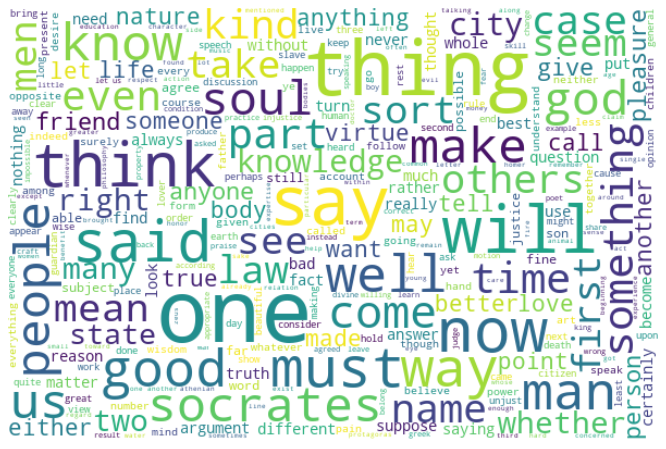

School =  ARISTOTLE :


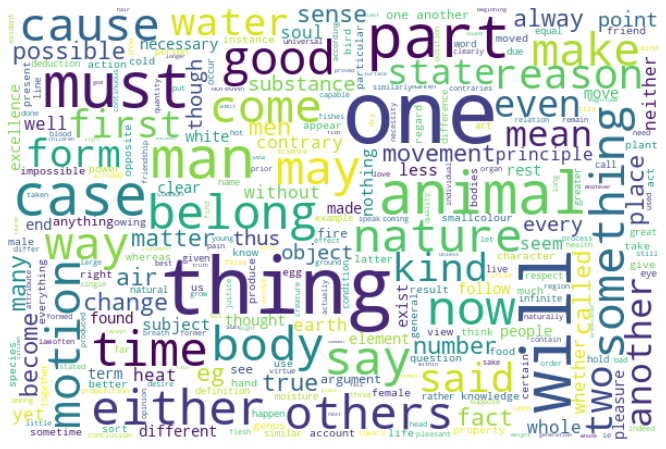

School =  EMPIRICISM :


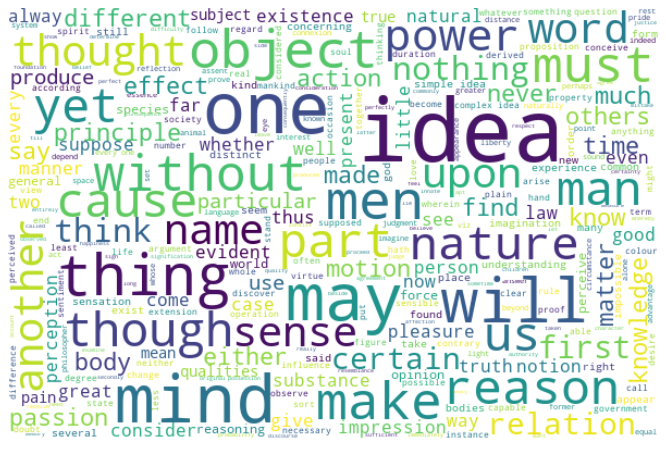

School =  RATIONALISM :


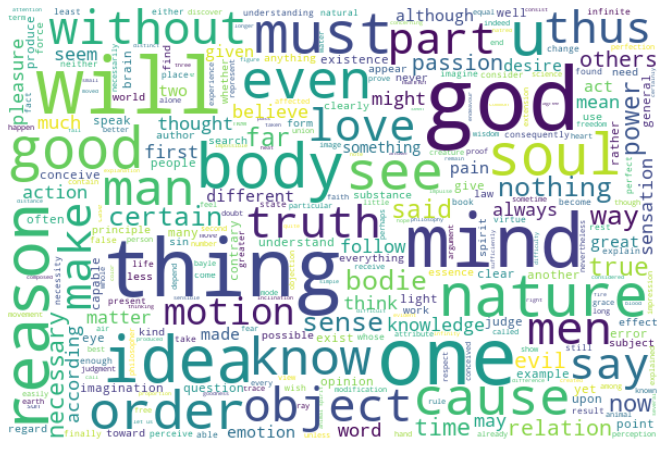

School =  ANALYTIC :


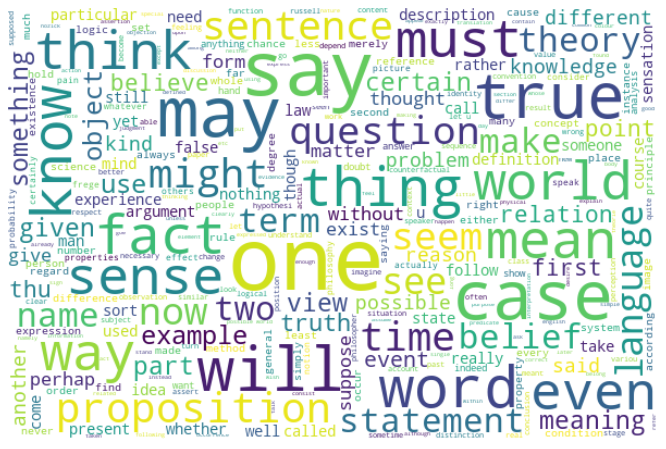

School =  CONTINENTAL :


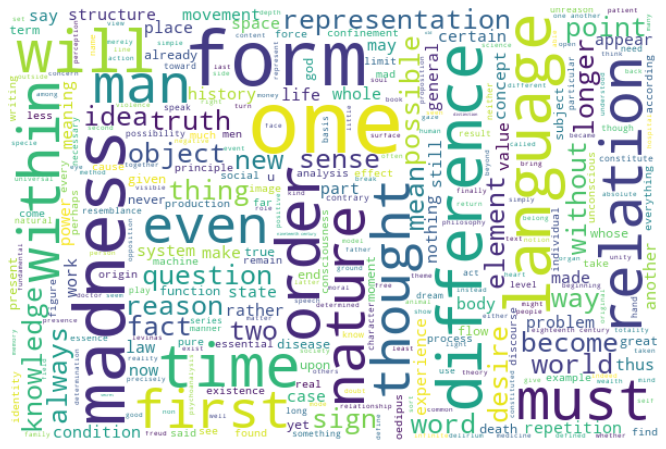

School =  PHENOMENOLOGY :


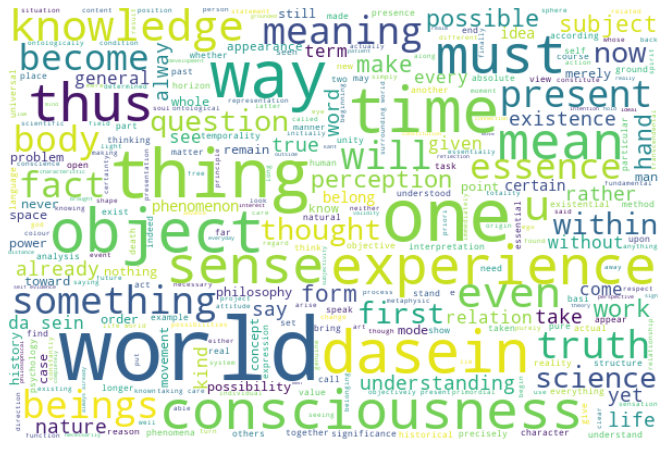

School =  GERMAN_IDEALISM :


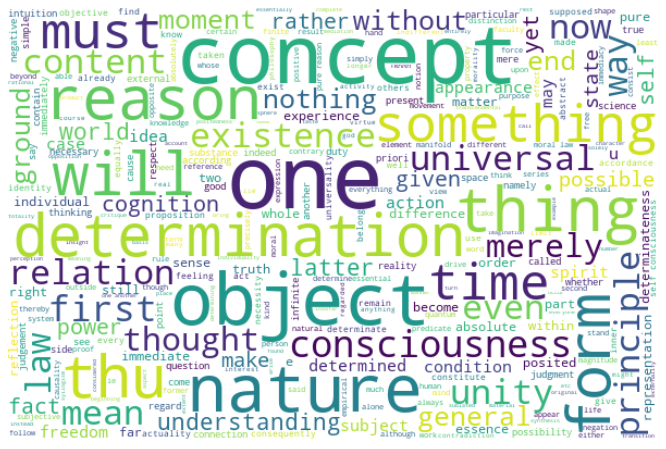

School =  COMMUNISM :


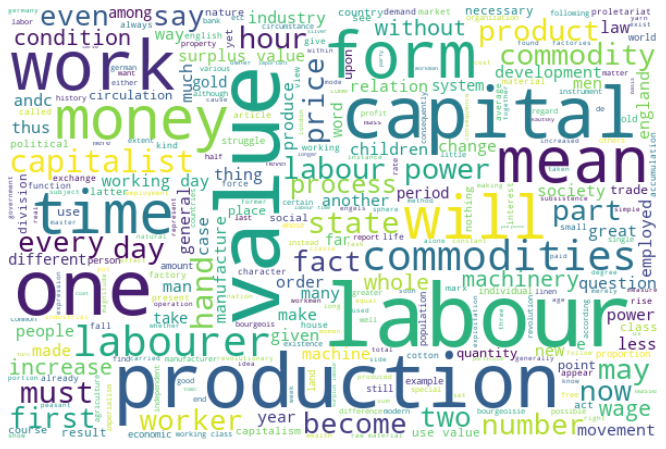

School =  CAPITALISM :


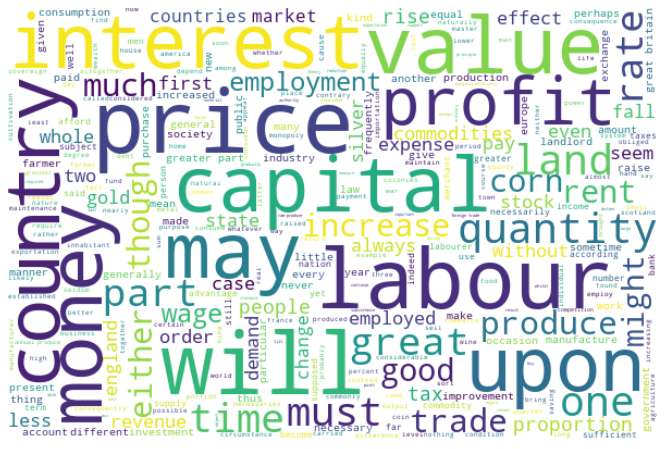

School =  STOICISM :


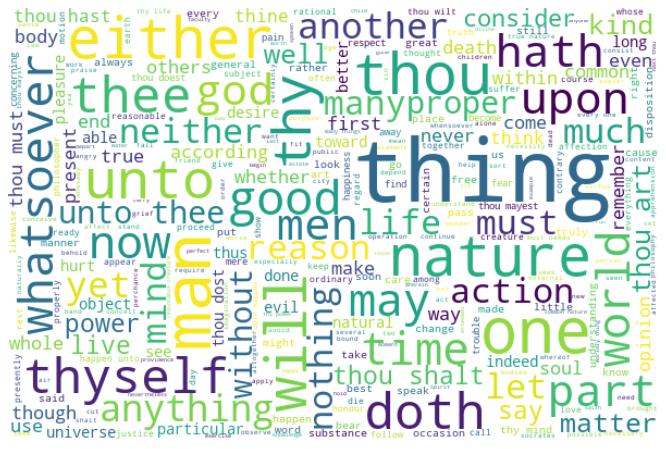

School =  NIETZSCHE :


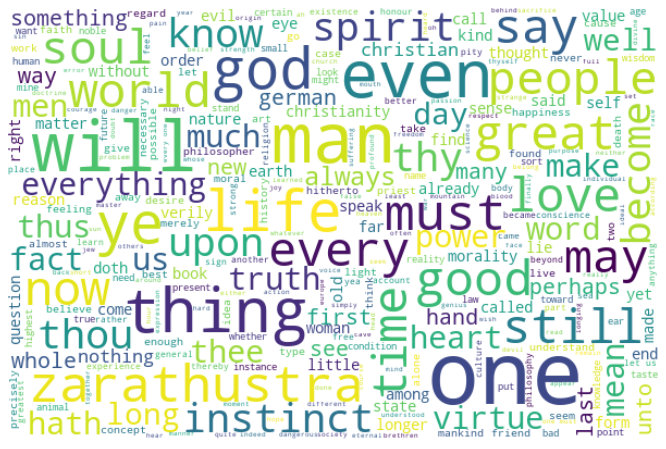

School =  FEMINISM :


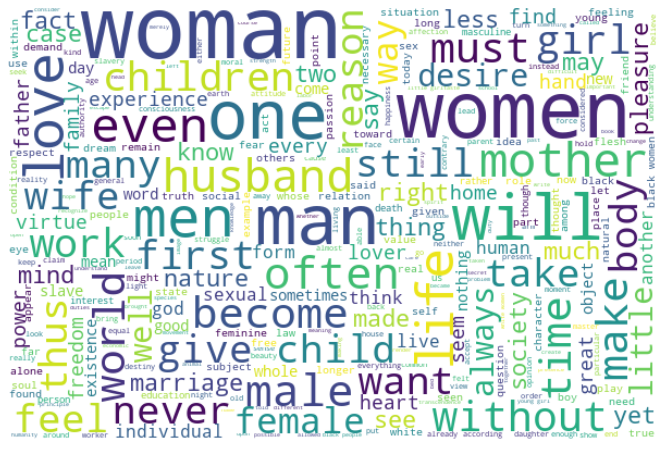

In [12]:
for sc in schools:
    df_temp = df[df.school==sc]
    print('School = ', sc.upper(), ':')
    
    # render wordcloud
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=80, max_words=300,
                          width = 600, height = 400,
                          background_color="white").generate(text)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### (4) Sentiment Analysis of the Data

Finally, after all the analysis of the outlook of the sentences(data), we can analyse the meaning of it. Based on sentiment analysis. We can get pie chart to see their atitude is positive, negative or neutral.

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def SentimentAnlysis(sentence):
    sentAnalyzer = SentimentIntensityAnalyzer() 
    sentDict = sentAnalyzer.polarity_scores(sentence)
    
    if sentDict['compound'] >= 0.05:
        return "positive"
    elif sentDict['compound'] <= -0.05 :
        return "negative"
    else:
        return "neutral"

def Analyzer(data, author):
    df = data [data['author'] == author] 
        
    #making a Corpus and finding sentiments
    corpus = ''
    numPostives = 0
    numNegatives = 0
    numNeutrals = 0
    
    for mem in df['sentence_lowered']:
        corpus += mem
    
    for i in range (len(df)):
        sent = (SentimentAnlysis(df['sentence_lowered'].iloc[i]))
        if sent == "positive":
            numPostives += 1
        elif sent == "negative":
            numNegatives += 1
        else:
            numNeutrals += 1
    
    plt.figure(figsize = (7, 7))
    plt.pie([numPostives, numNegatives, numNeutrals], labels = ['positives', 'negatives', 'neutrals'], autopct='%1.2f%%')
    plt.title('Sentiment Analysis for  Philosopher: ' + author)

/Users/YONGXINMA/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


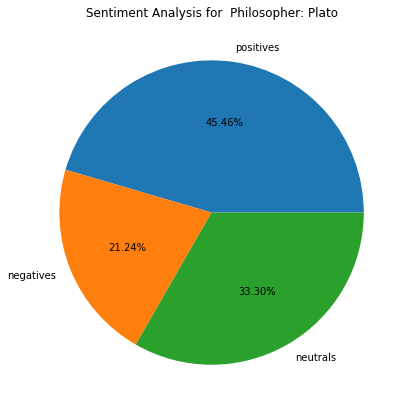

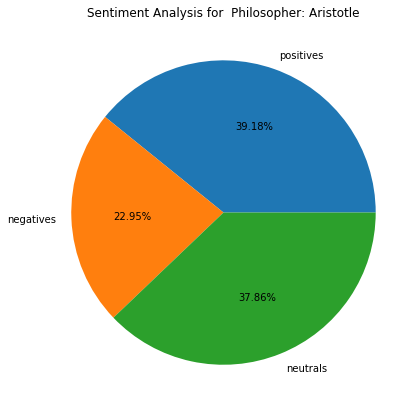

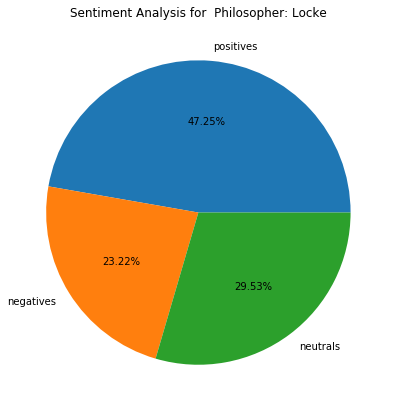

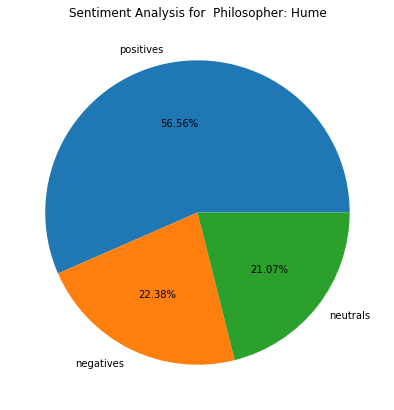

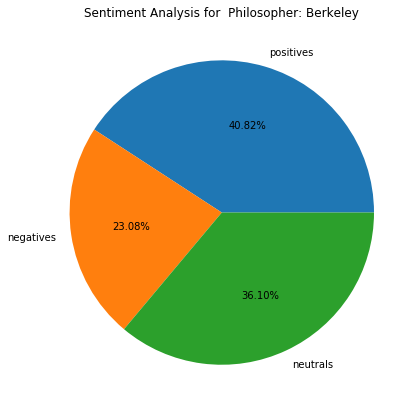

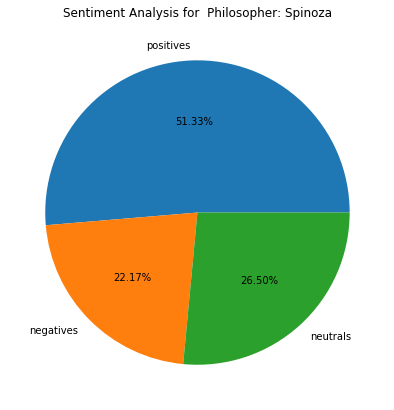

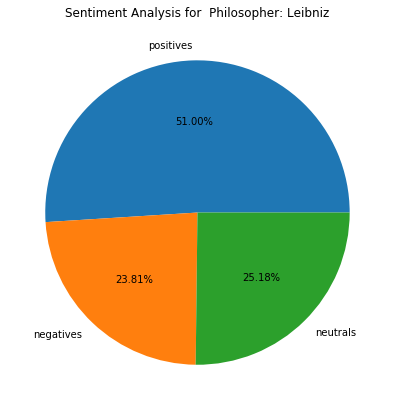

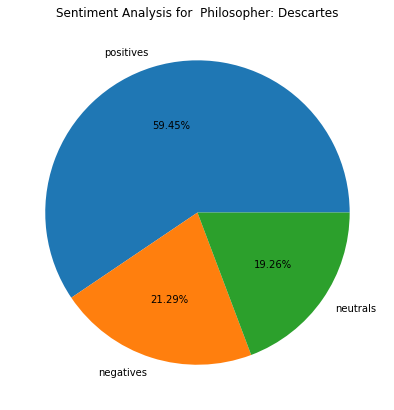

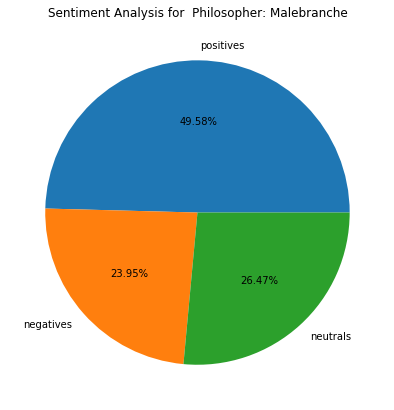

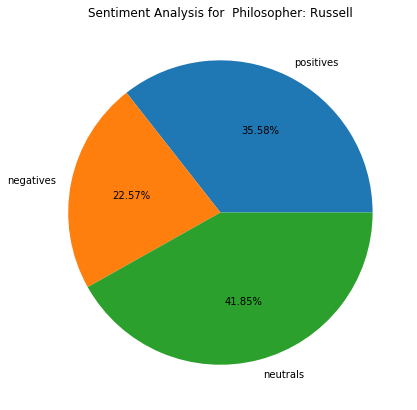

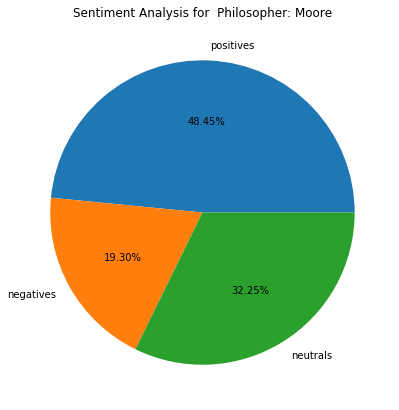

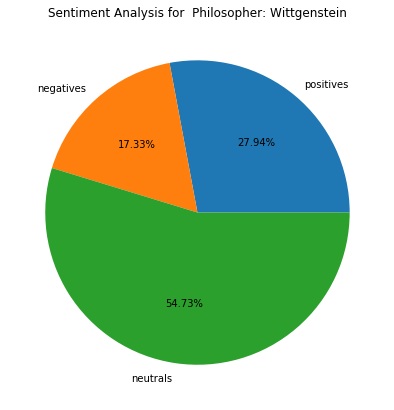

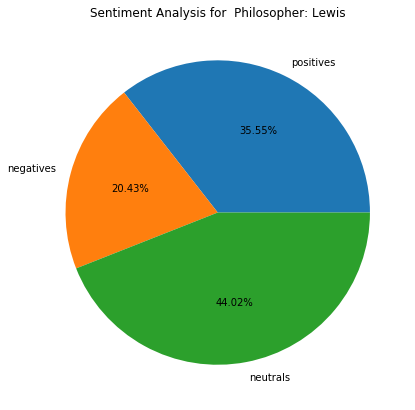

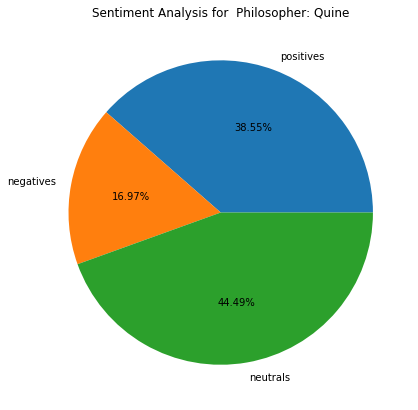

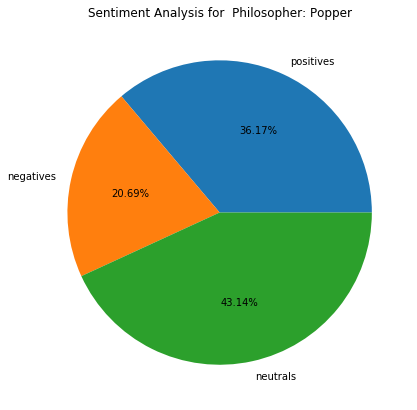

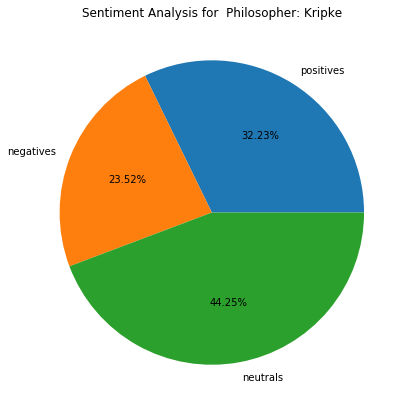

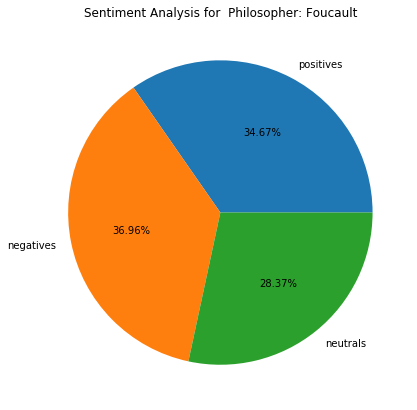

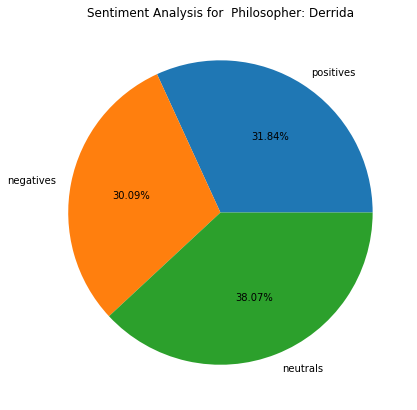

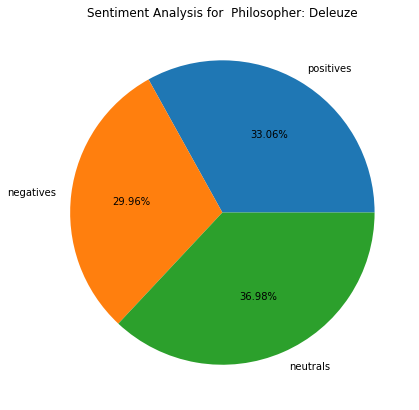

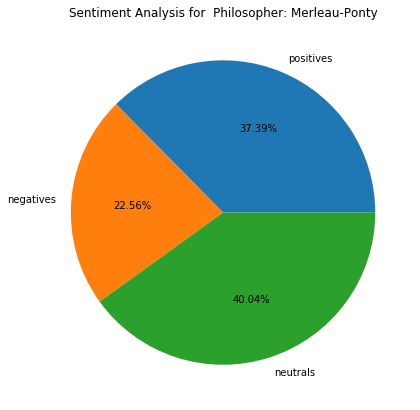

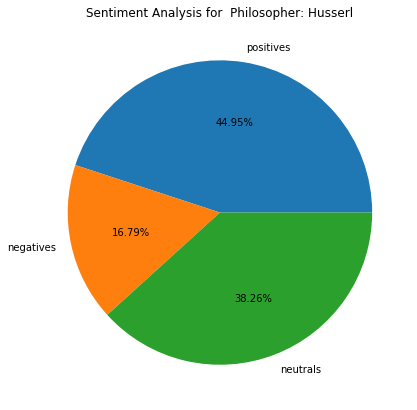

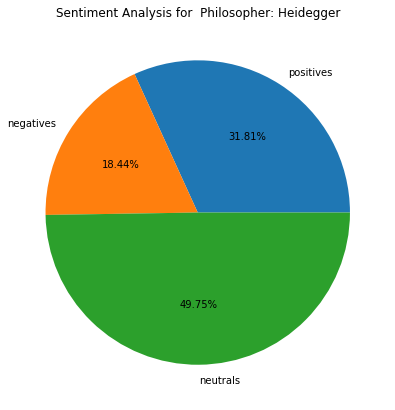

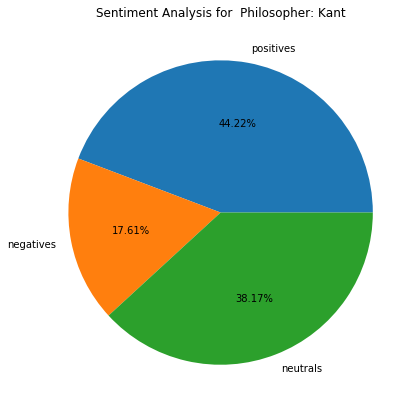

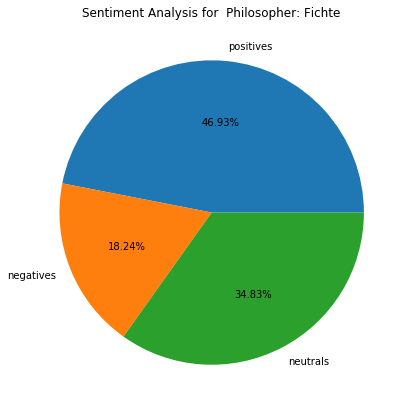

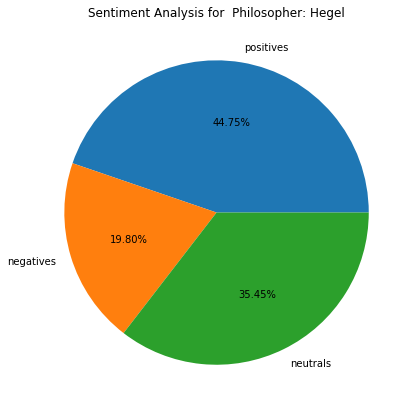

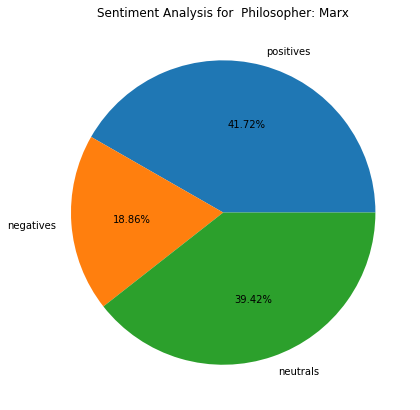

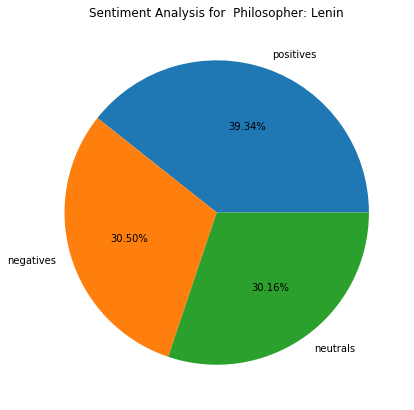

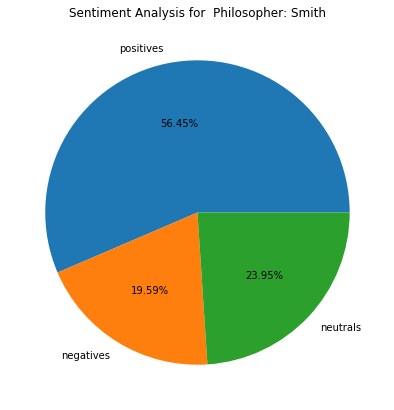

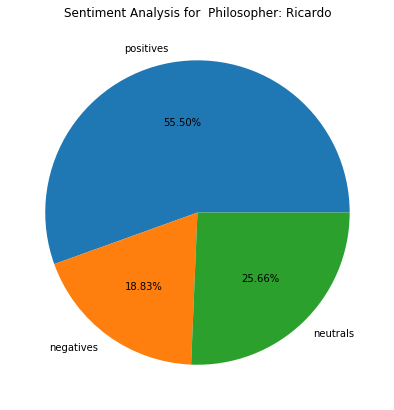

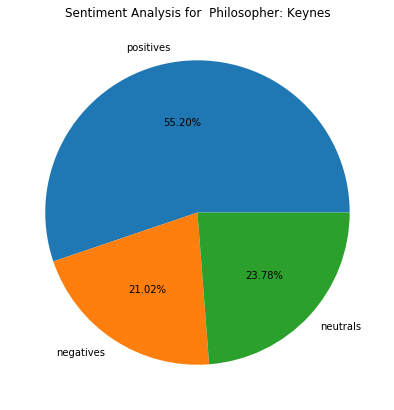

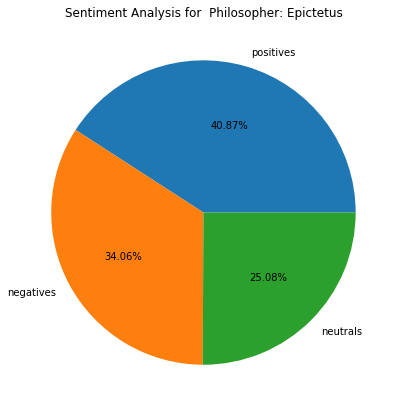

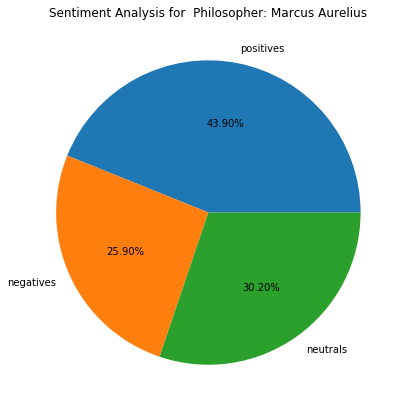

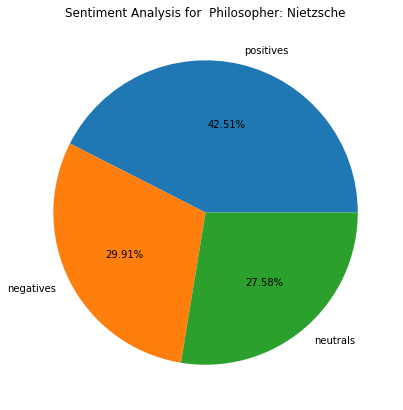

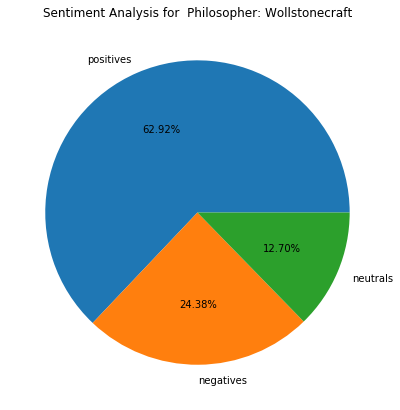

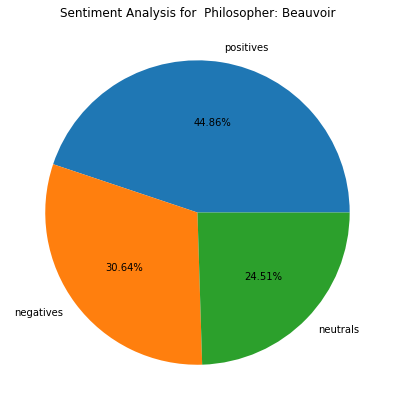

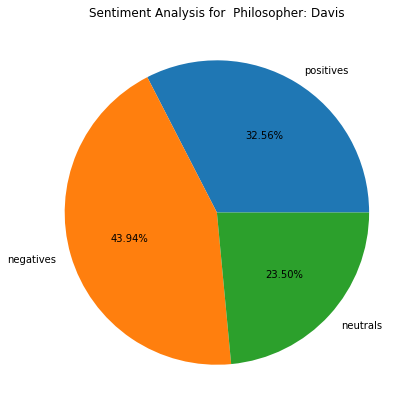

In [31]:
for author in authors:
    Analyzer(df,author)